In [1]:
import pathlib
import os
if not "changed_working_directory" in locals():
    changed_working_directory = True
    os.chdir(pathlib.Path().resolve().parent)
%load_ext autoreload
%autoreload 2

In [2]:
from tabGAN import TabGAN
from src import constants as const
import helpers
from v2_hp_tuning import fetch_hp_info

imports_path = "src//imports.ipynb"
tabGAN_path = "tabGAN.py"
utils_path = "utils\\utils.ipynb"
import helpers.hp_tuning

%run "$imports_path"

In [3]:
if const.dir.project() != os.getcwd():
    raise ValueError("Project directory not the same as in consts")

In [4]:
dataset_train_path = os.path.join(const.dir.data(), "df_adult_edited_train.csv")
dataset_test_path = os.path.join(const.dir.data(), "df_adult_edited_test.csv")

data_train = pd.read_csv(dataset_train_path)
data_test = pd.read_csv(dataset_test_path)
discrete_columns = data_train.columns[data_train.dtypes == "object"]

METHOD_NAME = "tabGAN-qtr"

In [5]:
def plot_hp_tuning(hp_name, allow_not_complete_hp_vec=True, n_synthetic_datasets=None, **kwargs):
    hp_info = fetch_hp_info(method=METHOD_NAME, version=5)
    curr_image_dir = os.path.join(const.dir.images_hp_v5(), METHOD_NAME)
    curr_hp_info = hp_info[hp_name]
    if n_synthetic_datasets is None:
        n_synthetic_datasets = curr_hp_info["n_synthetic_datasets"]
    result = helpers.hp_tuning.evaluate_hyperparams_through_prediction(
        data_train=data_train, 
        data_test=data_test,
        dataset_dir=const.dir.hp_tuning_v5(),
        hyperparams_vec=curr_hp_info["vec"],
        hyperparams_name = hp_name,
        hyperparams_subname = curr_hp_info["hyperparams_subname"],
        subfolder=METHOD_NAME,
        n_synthetic_datasets = n_synthetic_datasets,
        save_dir = const.dir.images_hp_v5(),
        save_path = f"predictive_performance_against_{hp_name}.svg",
        incl_comparison_folder=True,
        allow_not_complete_hp_vec=allow_not_complete_hp_vec,
        **kwargs
    )
    return result

  0%|          | 0/210 [00:00<?, ?it/s]

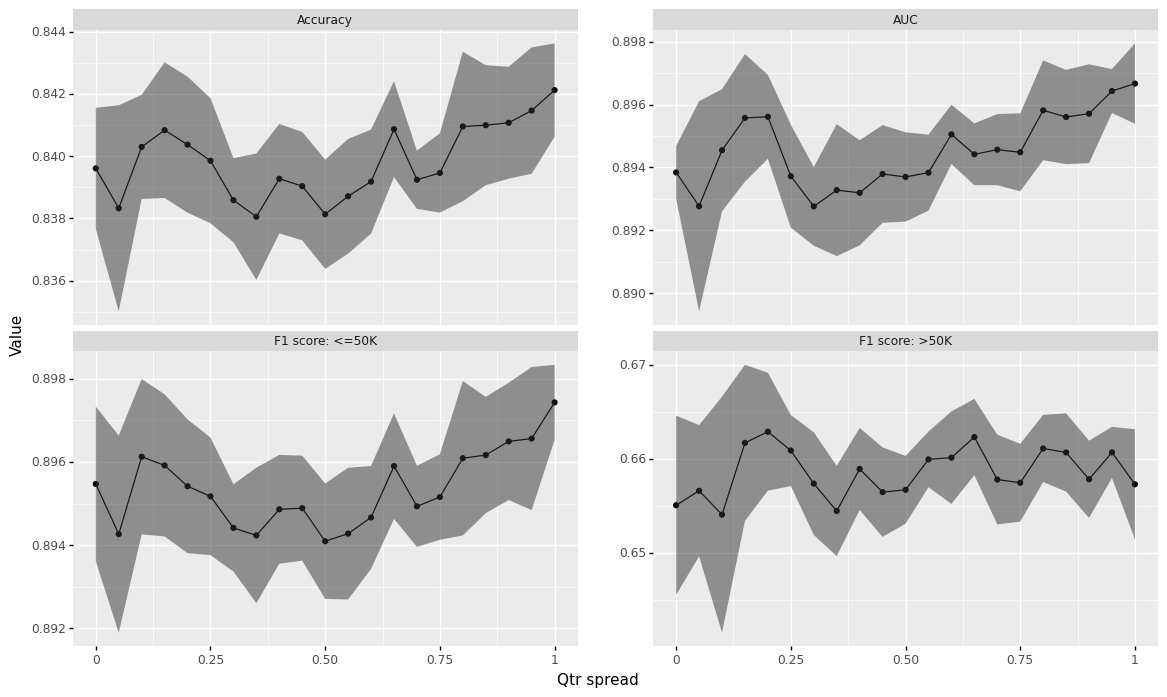

In [6]:
result_qtr_spread = plot_hp_tuning("qtr_spread", n_synthetic_datasets=10)

In [7]:
result_qtr_spread

,Qtr spread,Value Accuracy,Value AUC,Value F1,Value F1_0,Value F1_1,SD Accuracy,SD AUC,SD F1,SD F1_0,SD F1_1
0,0.00,0.839608,0.893843,0.775271,0.895474,0.655068,0.001949,0.000840,0.004423,0.001861,0.009521
1,0.05,0.838327,0.892768,0.775435,0.894267,0.656602,0.003310,0.003339,0.004332,0.002370,0.006971
2,0.10,0.840299,0.894548,0.775098,0.896129,0.654068,0.001674,0.001943,0.005699,0.001868,0.012536
3,0.15,0.840837,0.895576,0.778804,0.895919,0.661690,0.002180,0.002029,0.004236,0.001709,0.008292
4,0.20,0.840372,0.895613,0.779149,0.895418,0.662880,0.002187,0.001334,0.003457,0.001609,0.006260
5,0.25,0.839854,0.893723,0.778024,0.895175,0.660873,0.002009,0.001638,0.002498,0.001415,0.003770
6,0.30,0.838586,0.892762,0.775889,0.894416,0.657363,0.001353,0.001250,0.002758,0.001050,0.005454
7,0.35,0.838054,0.893279,0.774346,0.894236,0.654456,0.002031,0.002097,0.002597,0.001629,0.004796
8,0.40,0.839276,0.893195,0.776890,0.894863,0.658917,0.001760,0.001673,0.002490,0.001308,0.004361
9,0.45,0.839037,0.893793,0.775674,0.894891,0.656458,0.001741,0.001553,0.002674,0.001264,0.004752


  0%|          | 0/50 [00:00<?, ?it/s]

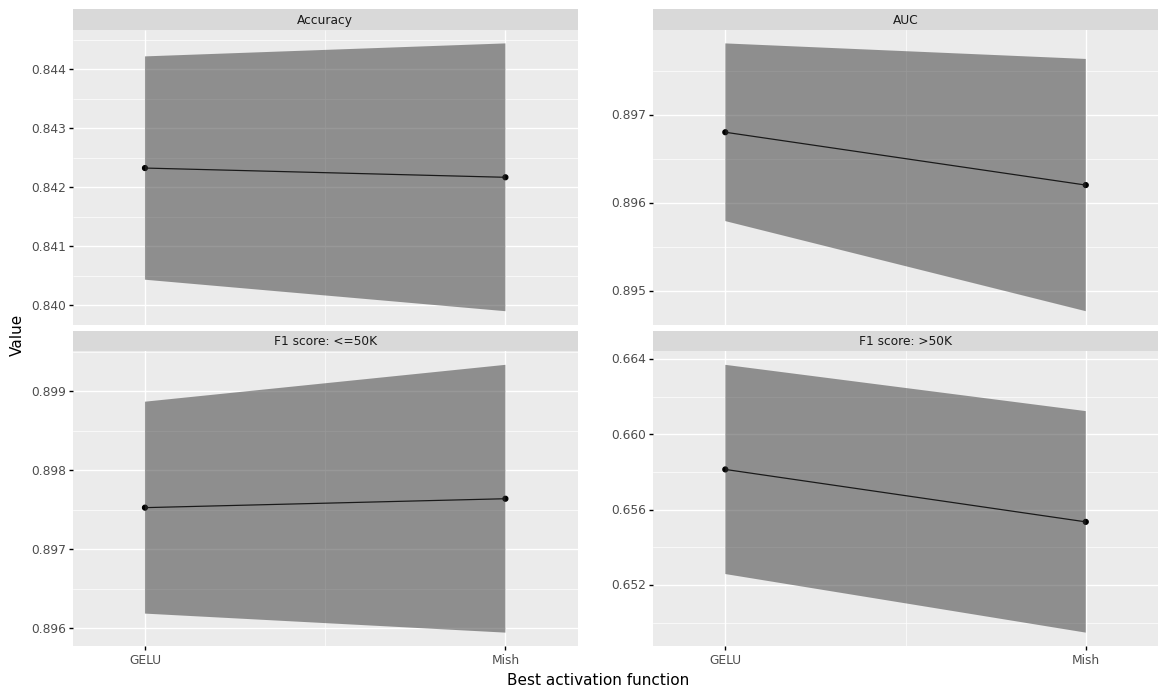

In [8]:
result_best_activation_function = plot_hp_tuning("best_activation_function")

In [9]:
result_best_activation_function

,Best activation function,Value Accuracy,Value AUC,Value F1,Value F1_0,Value F1_1,SD Accuracy,SD AUC,SD F1,SD F1_0,SD F1_1
0,GELU,0.842324,0.896801,0.777830,0.897525,0.658134,0.001892,0.001010,0.003090,0.001341,0.005558
1,Mish,0.842167,0.896200,0.776493,0.897638,0.655349,0.002268,0.001434,0.003281,0.001695,0.005885


  0%|          | 0/250 [00:00<?, ?it/s]

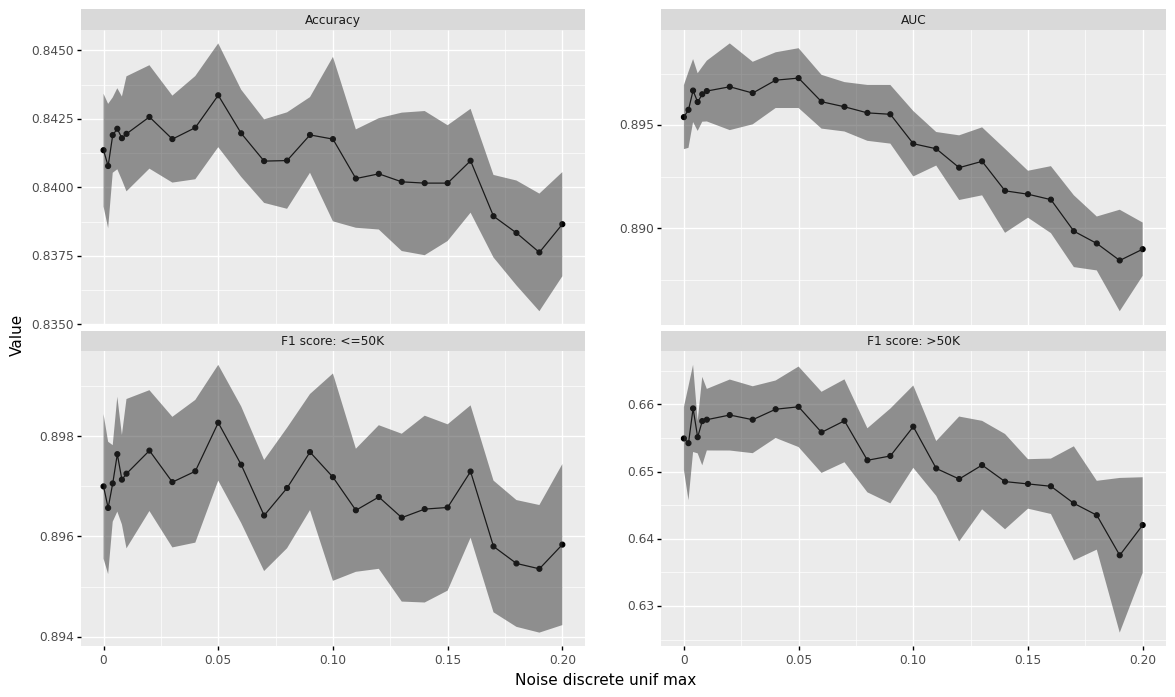

In [10]:
result_noise_discrete_unif_max = plot_hp_tuning("noise_discrete_unif_max")

  0%|          | 0/230 [00:00<?, ?it/s]

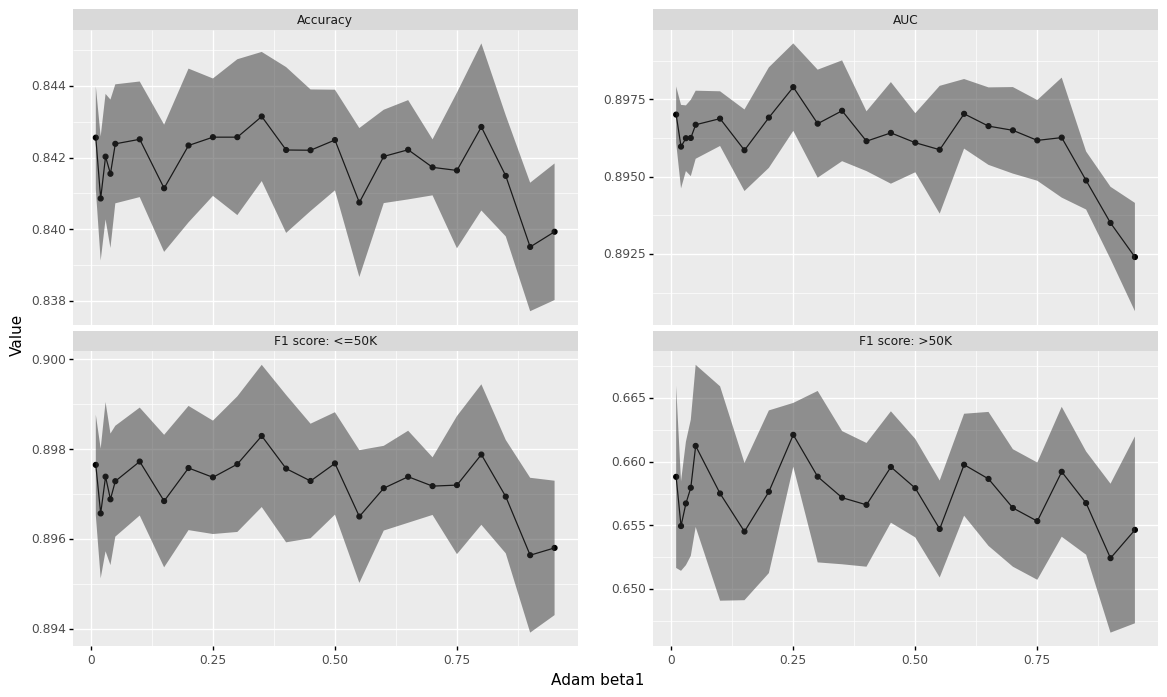

In [11]:
result_adam_beta1 = plot_hp_tuning("adam_beta1")

In [12]:
result_adam_beta1

,Adam beta1,Value Accuracy,Value AUC,Value F1,Value F1_0,Value F1_1,SD Accuracy,SD AUC,SD F1,SD F1_0,SD F1_1
0,0.01,0.842556,0.897005,0.778233,0.897652,0.658814,0.001438,0.000909,0.003545,0.001119,0.007156
1,0.02,0.840857,0.895970,0.775759,0.896571,0.654948,0.001734,0.001348,0.001869,0.001445,0.003517
2,0.03,0.842025,0.896242,0.777057,0.897389,0.656724,0.001753,0.001061,0.002106,0.001661,0.004848
3,0.04,0.841547,0.896250,0.777420,0.896885,0.657955,0.002074,0.001233,0.003105,0.001465,0.005348
4,0.05,0.842384,0.896677,0.779266,0.897289,0.661243,0.001663,0.001099,0.003295,0.001235,0.006367
5,0.10,0.842510,0.896874,0.777616,0.897726,0.657505,0.001615,0.000883,0.004205,0.001202,0.008419
6,0.15,0.841142,0.895853,0.775681,0.896846,0.654515,0.001778,0.001317,0.002703,0.001476,0.005390
7,0.20,0.842337,0.896908,0.777612,0.897582,0.657642,0.002148,0.001623,0.003688,0.001383,0.006388
8,0.25,0.842570,0.897891,0.779744,0.897375,0.662113,0.001640,0.001412,0.001659,0.001263,0.002507
9,0.30,0.842570,0.896711,0.778247,0.897668,0.658826,0.002177,0.001744,0.003735,0.001510,0.006732


  0%|          | 0/200 [00:00<?, ?it/s]

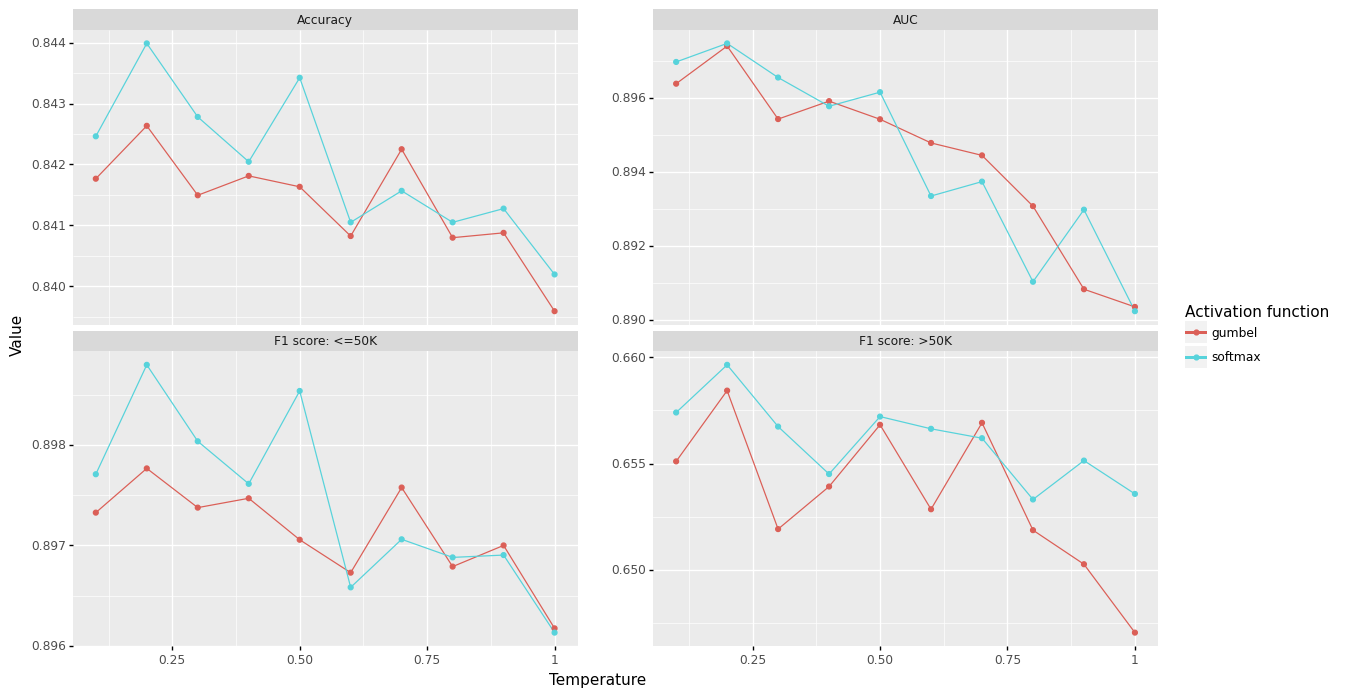

In [13]:
result_oh_encoding = plot_hp_tuning("oh_encoding")

  0%|          | 0/30 [00:00<?, ?it/s]

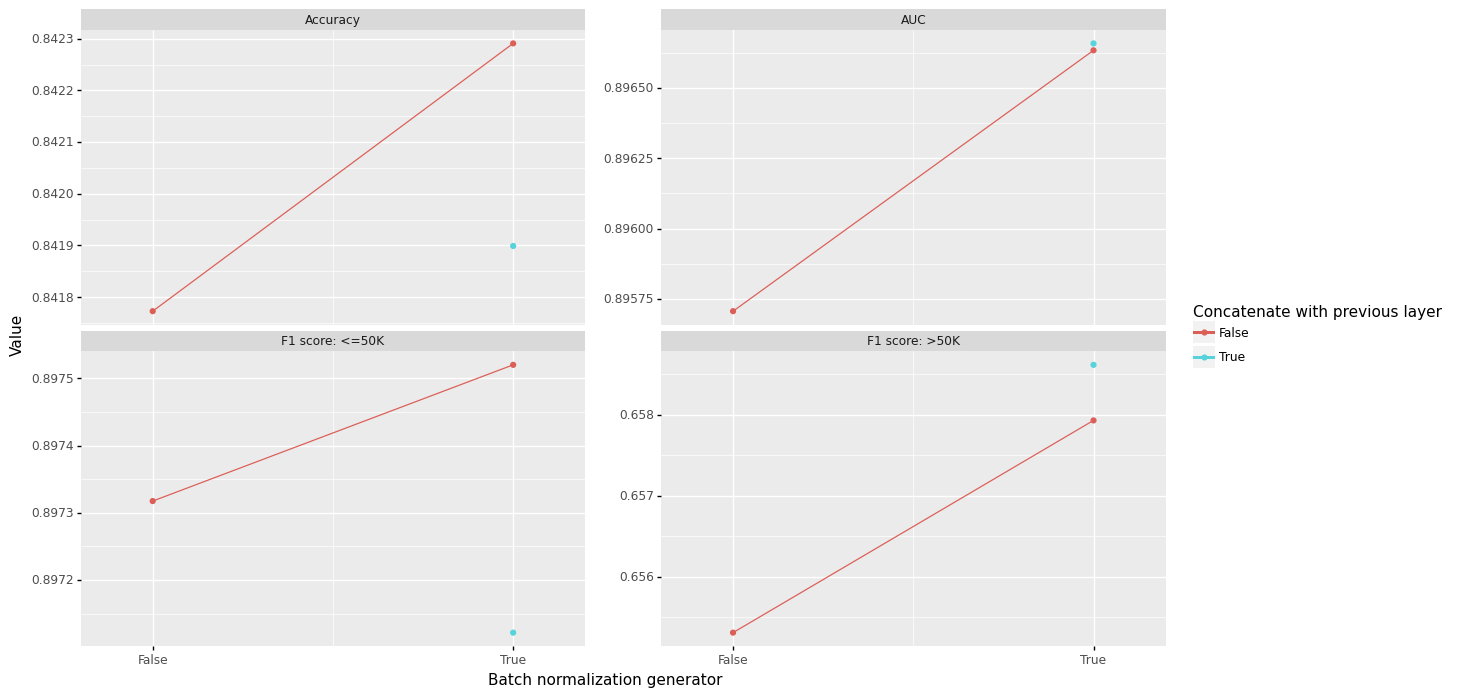

In [14]:
result_BN = plot_hp_tuning("BN")

In [15]:
result_BN

,Batch normalization generator,Concatenate with previous layer,Value Accuracy,Value AUC,Value F1,Value F1_0,Value F1_1,SD Accuracy,SD AUC,SD F1,SD F1_0,SD F1_1
0,False,False,0.841773,0.895706,0.776315,0.897318,0.655313,0.001999,0.001545,0.002693,0.001359,0.004193
1,True,False,0.842291,0.896633,0.777725,0.897520,0.657931,0.001396,0.001155,0.002704,0.000813,0.004743
2,True,True,0.841899,0.896658,0.777869,0.897122,0.658616,0.001626,0.001692,0.002811,0.001192,0.005230
